## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [23]:
path = r'C:\Users\rmr1q.000\Desktop\CareerFoundry\Section 6\New Taipei City Real Estate Data Set'

In [24]:
df = pd.read_csv(os.path.join(path, 'real_estate.csv'))

In [25]:
df.shape

(414, 8)

In [26]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [27]:
df.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

### 2. The elbow technique

In [28]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [29]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-663923028.4639182,
 -187053609.805882,
 -61014500.644654244,
 -42896606.653960645,
 -27766424.51501909,
 -20770104.53867426,
 -16847397.49101511,
 -13905452.38549045,
 -12450378.794916298]

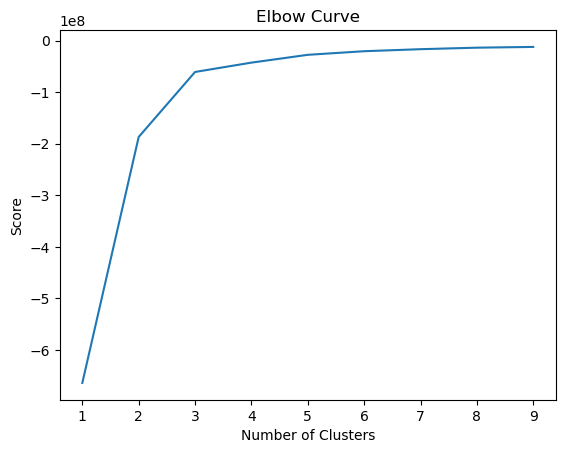

In [30]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [31]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [32]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [33]:
df['clusters'] = kmeans.fit_predict(df)

In [40]:
df.head(20)

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit,clusters,cluster
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1,purple
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1,purple
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1,purple
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1,purple
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1,purple
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1,2,dark purple
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3,1,purple
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7,1,purple
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8,0,pink
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1,2,dark purple


In [35]:
df['clusters'].value_counts()

clusters
1    280
2     93
0     41
Name: count, dtype: int64

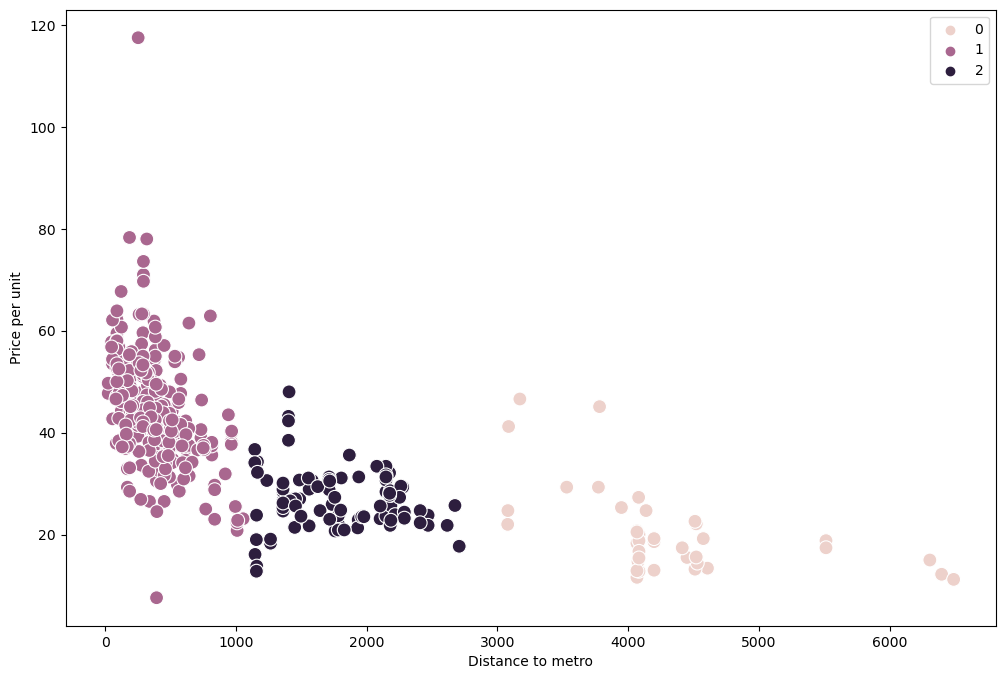

In [36]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['D. metro'], y=df['Price per unit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance to metro') # Label x-axis.
plt.ylabel('Price per unit') # Label y-axis.
plt.show()

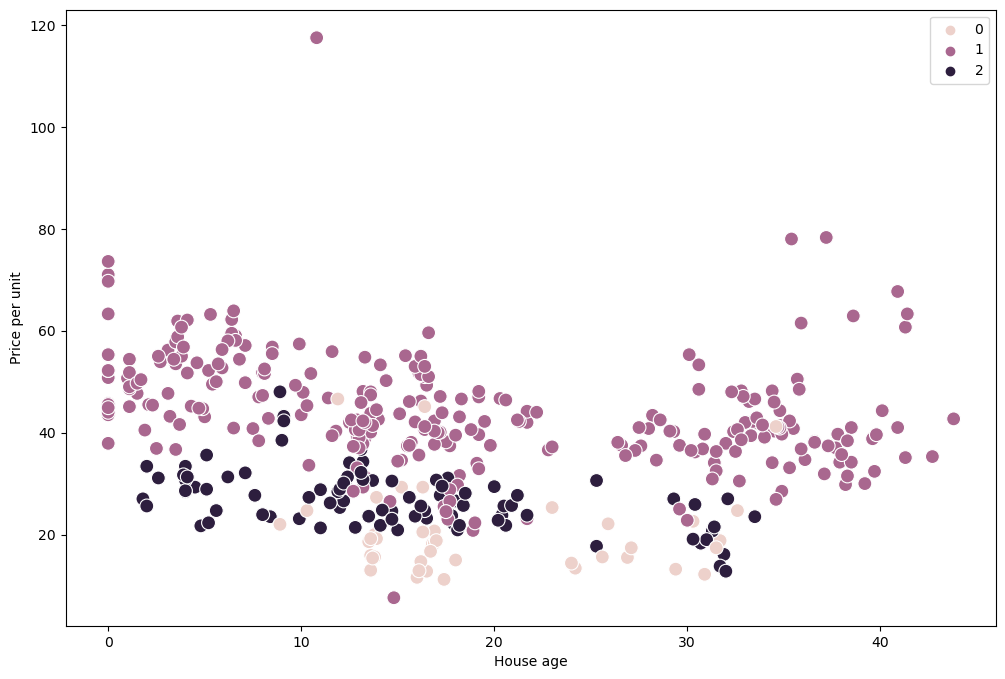

In [37]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['House age'], y=df['Price per unit'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('House age') 
plt.ylabel('Price per unit') 
plt.show()

In [38]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [39]:
df.groupby('cluster').agg({'N. shops':['mean', 'median'], 
                         'House age':['mean', 'median'], 
                         'D. metro':['mean', 'median'],
                          'Price per unit':['mean', 'median']})

N. shops         House age            D. metro             \
                 mean median       mean median         mean     median   
cluster                                                                  
dark purple  2.096774    2.0  15.229032   14.2  1767.950398  1735.5950   
pink         0.219512    0.0  19.534146   16.7  4296.208268  4082.0150   
purple       5.325000    5.0  18.270714   16.2   386.302676   373.6163   

            Price per unit         
                      mean median  
cluster                            
dark purple      26.706452   26.5  
pink             20.156098   18.3  
purple           44.334643   42.5